In [1]:
%reset -s -f
from scipy.special import expit
from rbm import RBM
from sampler import VanillaSampler, PartitionedSampler, ApproximatedSampler, LayerWiseApproxSampler
from trainer import VanillaTrainier
from performance import Result
import numpy as np
import datasets, performance, plotter, mnist, pickle, rbm, os, logging, sampler
from sklearn.linear_model import Perceptron
from sklearn.neural_network import BernoulliRBM
import plotter as pp

from collections import Counter

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

logger = logging.getLogger()
# Set the logging level to logging.DEBUG 
logger.setLevel(logging.INFO)


%matplotlib inline
from IPython.core.debugger import Tracer; debug_here = Tracer()

In [2]:
def squash_images(imgs):
    squashed = np.array(imgs)
    old_shape = squashed.shape
    squashed = squashed.reshape(old_shape[0], old_shape[1] * old_shape[2])
    return squashed

def inflate_images(imgs):
    inflated = np.array(imgs)
    old_shape = inflated.shape
    
    inflated = inflated.reshape(old_shape[0], old_shape[1]**2)
    return squashed

In [3]:
def gen_square(xy,sq_shape, img_size):
    """Square image starting at i, of sq_size within img_size. i must be < (sq_size + img_size)"""
    img = np.zeros(img_size)
    x = xy[0]
    y = xy[1]
    x2 = x + sq_shape[0]
    y2 = y + sq_shape[1]
    img[x:x2,y:y2] = 1
    return img

In [4]:
def gen_training(sq_shape, img_size):
    if img_size[0] != img_size[1]:
        logger.warn("Unsquashing will not work with none squares yet!")
    training = []
    for x in range(img_size[0]-1):
        for y in range(img_size[1]-1):
            training.append(gen_square((x,y), sq_shape, img_size))
    return np.array(training)

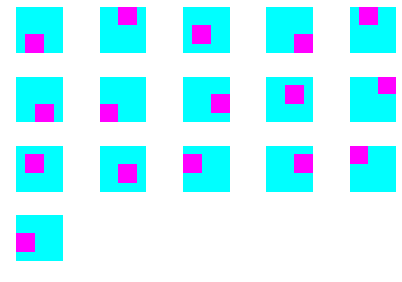

In [5]:
train = gen_training((2,2),(5,5))
np.random.shuffle(train)
pp.images(train)

In [11]:
# self.rbm.weights += learning_rate * (hebbian_pos - hebbian_neg).sum(0).transpose()
model = RBM(50,25,16)
s = VanillaSampler(model)
t = VanillaTrainier(model, s)
t.train(100000, squash_images(train))

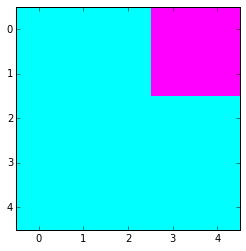

In [48]:
pp.image(s.dream(model).reshape(5,5))

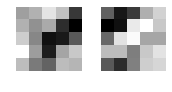

In [14]:
pp.images(rbm.weights_into_hiddens(model.weights)[5:7], cmap='Greys')